**통계학스터디 3장** 
데이타분석

In [99]:
import numpy as np
import scipy as sp
%precision 10
fish_data = np.array([2,3,3,4,4,4,4,5,5,6])

In [100]:
N = len(fish_data)
sum_value = np.sum(fish_data)
mu = sum_value/N
print(np.mean(fish_data))

4.0


In [101]:
sigma_sq = np.sum((fish_data-mu)**2)/N
unbiased_sigma2 = np.var(fish_data,ddof =1) #불편분산 보정된 분산일때 1로 설정
sigma_sq2= np.var(fish_data,ddof =0) # 분산

In [102]:
sigma = np.sqrt(unbiased_sigma2)
sigma2 =np.std(fish_data, ddof =1)

Z_standard = fish_data - mu
Z_mean =np.mean(Z_standard)
Z_sigma = fish_data/sigma #unbiased_sigma

Z_sigma2 = np.std(fish_data/sigma, ddof=1) #sigma가 unbiased 이므로 ddof도 1로 설정

standard = (fish_data-mu)/sigma #표준화 평균을 빼고 표준편차로 나눔


In [103]:
np.amax(fish_data) #최대값

6

In [104]:
np.amin(fish_data) # 최소값

2

In [105]:
np.median(fish_data)

4.0000000000

In [106]:
from scipy import stats # 통계분석 특화함수

In [107]:
fish_data_3 = np.array([1,2,3,4,5,6,7,8,9])
stats.scoreatpercentile(fish_data_3, 25) # 사분위수에서 하위 25%의 값

3.0000000000

In [108]:
stats.scoreatpercentile(fish_data_3, 75)

7.0000000000

In [109]:
import pandas as pd
import scipy as sp

In [111]:
%precision 10

'%.10f'

In [112]:
#물고기 데이타 프레임생성
a = np.array([0,1,2,3,4,5])
b = np.array(["A","A","A","B","B","B"])
c = np.array([2,3,4,6,8,10])

fish_multi = pd.DataFrame({

    'species': b,
    'length': c
})

In [113]:
fish_multi

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [114]:
group = fish_multi.groupby("species")
print(group.mean())

         length
species        
A           3.0
B           8.0


In [115]:
print(group.std(ddof=1))# 표준편차 자유도넣고 

         length
species        
A           1.0
B           2.0


In [116]:
group.describe()

length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

In [117]:
#구두 판매데이타

d = np.array(["tokyo","tokyo","osaka","osaka"])
e = np.array(["blue","red","blue","red"])
f = np.array([10, 15, 13, 9])

shoes = pd.DataFrame({

    'store':d,
    'color':e,
    'sales':f
})

In [118]:
shoes

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [119]:
cross = pd.pivot_table( #필요한 형태로 데이타 확인
    data  = shoes, # 가져올데이타프레임
    values = 'sales', # 표시값
    aggfunc= 'sum', # 함수지정
    index = 'store', # 교차분석표의 row
    columns='color'  # 교차분석표의 column
)
cross

color,blue,red
store,,
osaka,13,9
tokyo,10,15


In [120]:
from scipy.special import y0
# 공분산 실습

x = np.array([18.5, 18.7, 19.1, 19.7, 21.5, 21.7, 21.8, 22.0, 23.4, 23.8])
y = np.array([34, 39, 41, 38, 45, 41, 52, 44, 44, 49])

cov_data = pd.DataFrame({
    'x': x,
    'y': y
})
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


In [121]:
#데이타 분리
x = cov_data["x"]
y = cov_data["y"]
#표본크기
N = len(cov_data)
#평균값 계산
mu_x = np.mean(x)
mu_y = np.mean(y)

In [122]:
cov_sample = sum((x-mu_x)*(y-mu_y))/N
cov_sample

6.9060000000

공분산

In [123]:
cov= sum((x-mu_x)*(y-mu_y))/(N-1)
cov

7.6733333333

In [124]:
print(np.cov(x,y, ddof= 0)) #공분산 행렬 

[[ 3.2816  6.906 ]
 [ 6.906  25.21  ]]


In [125]:
print(np.cov(x,y, ddof=1))

[[ 3.6462222222  7.6733333333]
 [ 7.6733333333 28.0111111111]]


**피어슨 상관계수와 상관행렬**

In [126]:
#분산계산
sigma_2_x = np.var(x, ddof = 1)
sigma_2_y = np.var(y, ddof= 1)
# 상관계수
rho = cov / np.sqrt(sigma_2_x * sigma_2_y)
rho


0.7592719041

In [77]:
np.corrcoef(x,y) #상관행렬

array([[1.   , 0.759],
       [0.759, 1.   ]])

In [78]:
import numpy as np
import pandas as pd

%precision 3
from matplotlib import pyplot as plt
%matplotlib inline


In [79]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([2,3,4,3,5,4,6,7,4,8])

**꺽은선 그래프**

Text(0, 0.5, 'Y')

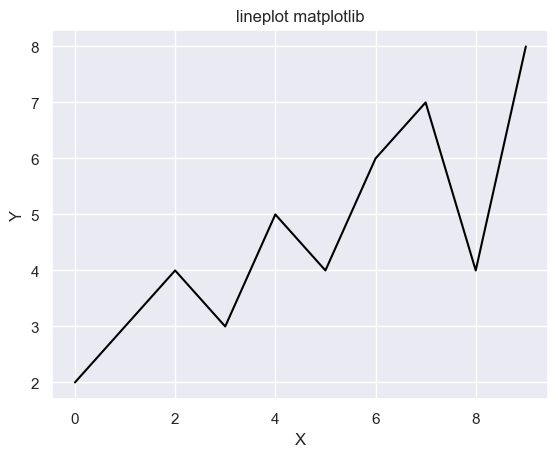

In [80]:
plt.plot(x,y,color='black') # x,y 가 같은 개수로 있어야함
plt.title("lineplot matplotlib") #타이틀
plt.xlabel("X")#라벨 붙이기
plt.ylabel("Y")

In [81]:
import seaborn as sns
sns.set()

In [82]:
fish_data = np.array([2,3,3,4,4,4,4,5,5,6])

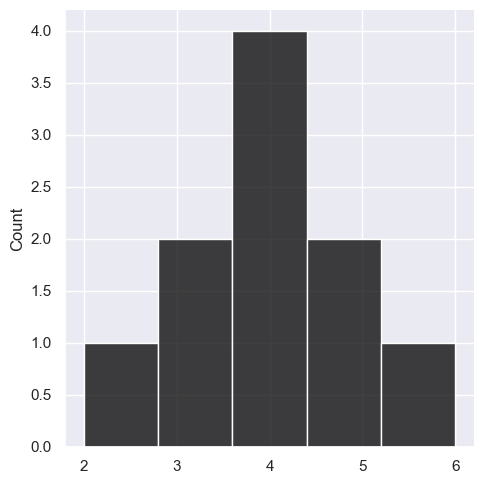

In [83]:
sns.displot(fish_data, bins = 5, color ='black', kde = False)

<AxesSubplot: ylabel='Count'>

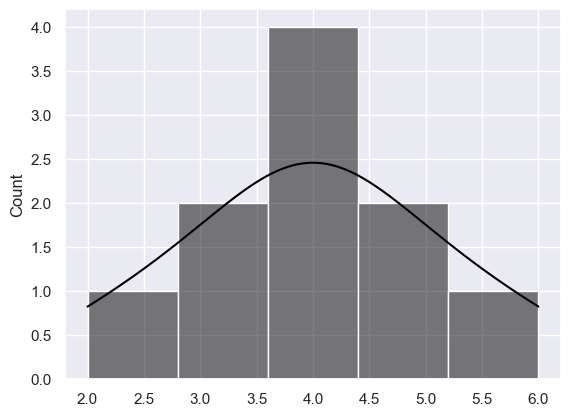

In [84]:
sns.histplot(fish_data, color ='black',kde = True )

In [85]:
a = np.array(["A","A", "A", "A","A","A","A","A","A","A","B","B","B","B","B","B","B","B","B","B"])
b = np.array([2,3,3,4,4,4,4,5,5,6,5,6,6,7,7,7,7,8,8,9])
len(b)
len(a)

20

In [86]:
#물고기 데이타 프레임생성

fish_multi = pd.DataFrame({

    'species': a,
    'length': b
})

In [87]:
fish_multi.groupby("species").describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [88]:
#겹쳐진 그래프 그리기
length_a = fish_multi.query("species == 'A'")["length"]
length_b = fish_multi.query("species == 'B'")["length"]
length_b

10    5
11    6
12    6
13    7
14    7
15    7
16    7
17    8
18    8
19    9
Name: length, dtype: int32

<AxesSubplot: xlabel='length', ylabel='Count'>

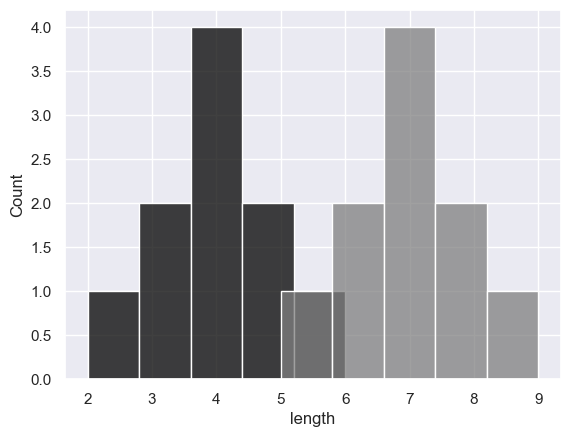

In [89]:
sns.histplot(length_a, bins = 5, color = 'black', kde = False)
sns.histplot(length_b, bins = 5, color = 'grey', kde = False)

<AxesSubplot: xlabel='species', ylabel='length'>

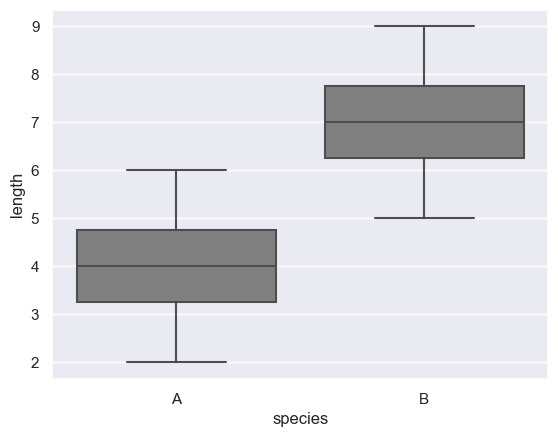

In [90]:
# 박스플롯 그리기
# 중앙값과 75%, 25% 사분위점을 알기쉬움
sns.boxplot(x = 'species', y = 'length', data = fish_multi, color = 'grey')

<AxesSubplot: xlabel='species', ylabel='length'>

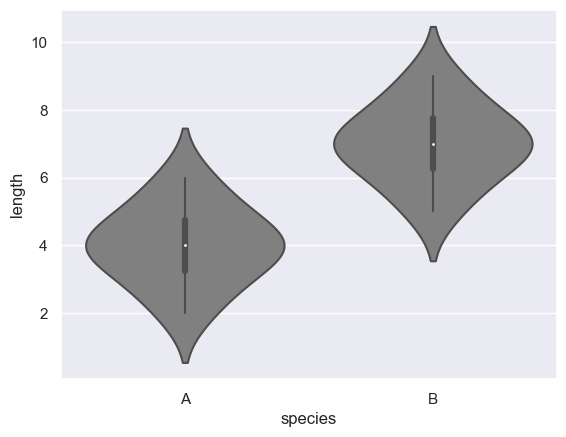

In [91]:
#바이올린플롯
#도수(빈도수)의 집중되어진 정보가 추가되어있음

sns.violinplot(x = "species", y = "length", data = fish_multi, color = 'grey')

<AxesSubplot: xlabel='species', ylabel='length'>

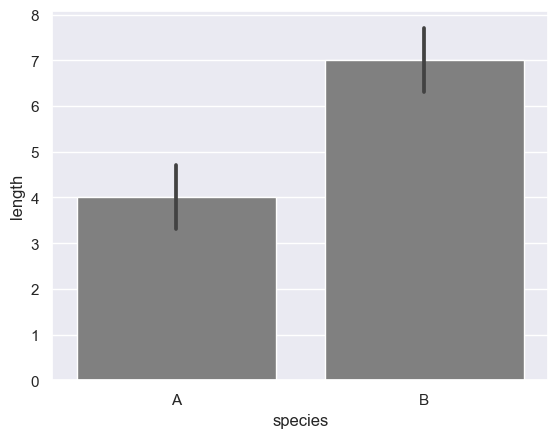

In [92]:
# 막대높이는 평균값 검은선은 에러바(신뢰구간)
sns.barplot(x = 'species', y = 'length', data = fish_multi, color = 'gray')

In [93]:
#산포도

x = np.array([18.5, 18.7, 19.1, 19.7, 21.5, 21.7, 21.8, 22.0, 23.4, 23.8])
y = np.array([34, 39, 41, 38, 45, 41, 52, 44, 44, 49])

cov_data = pd.DataFrame({
    'x': x,
    'y': y
})
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


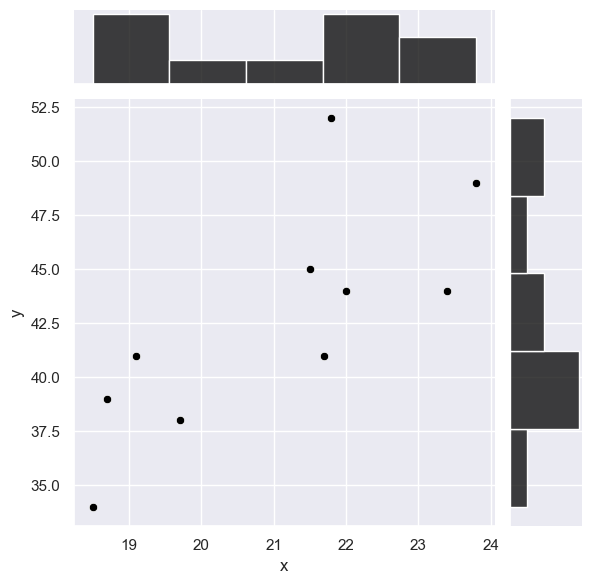

In [94]:
sns.jointplot(x = 'x', y = 'y', data = cov_data, color = 'black')

In [95]:
iris = sns.load_dataset("iris")
iris.head(n = 3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [96]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


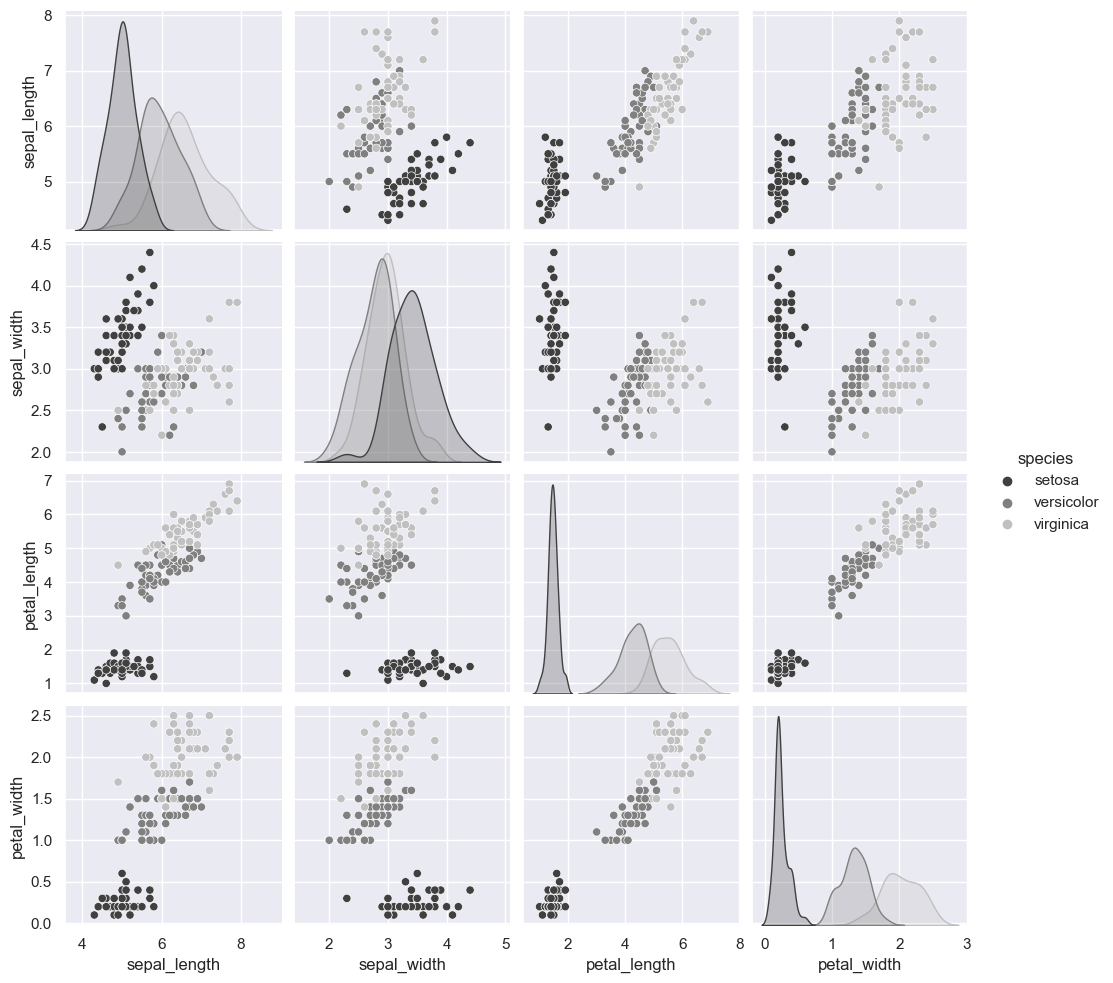

In [97]:
sns.pairplot(iris, hue = "species", palette = 'gray')